## Wrangle and Analyze: WeRateDogs ([@dog_rates](https://twitter.com/dog_rates))

<br>
<p> A  data analysis project focused on data wrangling efforts. </p>

<br>

### Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
  - Detect and document at least eight (8) quality issues and two (2) tidiness issues
- [Clean](#clean)
- [Storing, Analyzing, and Visualizing Data](#store)
  - At least three (3) insights and one (1) visualization must be produced
- [Wrangling Efforts Report](https://github.com/chelseymarie6/Wrangle-and-Analyze-Data)
- [Communicate Findings Report](https://github.com/chelseymarie6/Wrangle-and-Analyze-Data)

-------------

<a id='intro'></a>
### Introduction

Real-world data rarely comes clean. Using Python and its libraries, I gathered data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I documented my wrangling efforts in a Jupyter Notebook, and showcase them through analyses and visualizations using Python (and its libraries).

The dataset use for this wrangling project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

--------------

<a id='gather'></a>
### Gather

Data will be gathered from three resources:

1. The WeRateDogs Twitter archive. The twitter_archive_enhanced.csv file was provided to me.

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file was provided to me.

3. Twitter API and Python's Tweepy library to gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data I find interesting.

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd

1. Gathering the WeRateDogs Twitter archive

In [2]:
# Open the csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Gathering the tweet image predictions

In [3]:
# Download the image prediction file using the link provided to Udacity students
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [4]:
# Showing the data in the image predictions file

images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Gather the tweets' retweet count and like count - query the Twitter API using the Python Tweepy library

In [5]:
# Tweepy Doc: https://tweepy.readthedocs.io/en/v3.5.0/
# Twitter API keys are saved in creds.py which is listed in the .gitignore file (not pushed to Github)

import creds
import json
import time
import tweepy 

auth = tweepy.OAuthHandler(creds.consumer_key, creds.consumer_secret)
auth.set_access_token(creds.access_token, creds.access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Query Twitter's API for JSON data - match to each Tweet ID from the archive

# this starts the timer
start = time.time()

tweet_ids = archive.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)

# this stops the timer            
end = time.time()

print(end - start)

Rate limit reached. Sleeping for: 22


888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
845459076796616705
842892208864923648
837012587749474308
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968


Rate limit reached. Sleeping for: 634


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 631


1997.356496334076


In [28]:
# Store data to tweet_json.txt
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_data, file)

In [ ]:
# Loading the Twitter API data
twitter_counts_df = pd.read_json('tweet_json.txt')
twitter_counts_df['tweet_id'] = tweet_success
twitter_counts_df = twitter_counts_df[['tweet_id', 'favorite_count', 'retweet_count']]

In [9]:
twitter_counts_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37664,8210
1,892177421306343426,32352,6072
2,891815181378084864,24372,4015
3,891689557279858688,40966,8360
4,891327558926688256,39178,9067


------------------

<a id='assess'></a>
### Assess

This section will go over the following:
- Quality Issues
- Tidiness Issues

#### Quality Issues
<br>

*The four main data quality dimensions are:*

- *Completeness: missing data?*
- *Validity: does the data make sense?*
- *Accuracy: inaccurate data? (wrong data can still show up as valid)*
- *Consistency: standardization?*

<br>

**archive:**
- Completeness:
  - missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
  - tweet_id is an int (applies to all tables)
- Validity:
  - dog names: some dogs have 'None' as a name, or 'a', or 'an.'
  - this dataset includes retweets, which means there is duplicated data (as a result, these columns will be empty: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
- Accuracy:
  - timestamp is an object
  - retweeted_status_timestamp is also an object (the other retweeted statuses are floats)
  - rating_numerator goes up to 1776
- Consistency:
  - rating_denominator should be a standard 10, but there are a multitude of other values
  - the source column still has the HTML tags 

**images:**
- Validity:
  - p1, p2 and p3 columns have invalid data...why would the algorithm labeled a dog photo as a starfish, boathouse, or mailbox (among other things)?
- Consistency:
  - p1, p2 and p3 columns aren't consistent when it comes to capitalization: sometimes the dog breed listed is all lowercase, sometimes it is written in Sentence Case.
  - in p1, p2 and p3 columns there is an underscore for multi-word dog breeds

**twitter_counts_df:**
- Completeness:
  - missing some data


#### Tidiness Issues

<br>

*Three requirements for tidiness:*
- *Each variable forms a column*
- *Each observation forms a row*
- *Each type of observational unit forms a table*

<br>

**archive:**
- The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo)

**images:**
- this data set is part of the same observational unit as the data in the archive - one table with all basic information about the dog ratings

**twitter_counts_df:**
- this data set is also part of the same observational unit - one table with all basic information about the dog ratings

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
twitter_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [13]:
archive['name'].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Lola               10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
Bailey              7
an                  7
Toby                7
Daisy               7
Buddy               7
Koda                6
Scout               6
Bella               6
Oscar               6
Milo                6
Jack                6
Stanley             6
Dave                6
Jax                 6
Leo                 6
Rusty               6
Gus                 5
                 ... 
Liam                1
Jarod               1
Butters             1
Berb                1
Thor                1
Pavlov              1
Dutch               1
Buddah              1
Erik                1
Alejandro           1
Lilli               1
Ricky               1
Aja                 1
Grizzwald           1
Monkey    

In [14]:
#images['p1'].value_counts()
images['p2'].value_counts()
#images['p3'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
chow                               20
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [15]:
#archive.rating_numerator.value_counts()
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

-----------------

<a id='clean'></a>
### Clean

This section consists of the cleaning portion of the data wrangling process:
- Define
- Code
- Test

In [16]:
# Make a copy of the tables before cleaning
archive_clean = archive.copy()
images_clean = images.copy()
twitter_counts_df_clean = twitter_counts_df.copy()

#### Define
1.	Merge the clean versions of archive, images, and twitter_counts_df dataframes Correct the dog types
2.	Create one column for the various dog types: doggo, floofer, pupper, puppo Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
3.	Delete retweets
4.	Remove columns no longer needed
5.	Change tweet_id from an integer to a string 
6.	Change the timestamp to correct datetime format
7.	Correct naming issues
8.	Standardize dog ratings
9.	Creating a new dog_breed column using the image prediction data

#### #1 Code and Test: Merge the clean versions of archive, images, and twitter_counts_df dataframes

In [81]:
from functools import reduce
dfs = [archive_clean, images_clean, twitter_counts_df_clean]
twitter_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs)

In [82]:
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37664,8210
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067


In [83]:
# 1. Testing to see if functools worked
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

#### #2 Code and Test: Create one column for the various dog types: doggo, floofer, pupper, puppo

In [84]:
# Extract the text from the columns into the new dog_type colunn
twitter_dogs['dog_type'] = twitter_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [85]:
# 2 - Testing
#twitter_dogs[['dog_type']].head()
#twitter_dogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].head()
twitter_dogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
1462,NaN,None,None,None,None
11,NaN,None,None,None,None
454,NaN,None,None,None,None
831,NaN,None,None,None,None
1684,NaN,None,None,None,None
1430,NaN,None,None,None,None
2024,NaN,None,None,None,None
1089,NaN,None,None,None,None
466,NaN,None,None,None,None
1866,NaN,None,None,None,None


In [22]:
# 2 - Coding (cont)
# Dropping the other columns with dog types
#twitter_dogs = twitter_dogs.drop(['doggo'], axis = 1, inplace=True)

In [86]:
# 2 - Test (cont)
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,37664,8210,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067,NaN


#### #3 Code and Test: Delete retweets

In [87]:
# 3 - Code 
#Keep the columns where retweeted_status_id is NaN
twitter_dogs = twitter_dogs[np.isnan(twitter_dogs.retweeted_status_id)]

In [88]:
# 3 - Test
# Verify no non-null entires are left
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 31 columns):
tweet_id                      1991 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1991 non-null object
source                        1991 non-null object
text                          1991 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1991 non-null object
rating_numerator              1991 non-null int64
rating_denominator            1991 non-null int64
name                          1991 non-null object
doggo                         1991 non-null object
floofer                       1991 non-null object
pupper                        1991 non-null object
puppo                         1991 non-null object
jpg_url                       1991 non

In [89]:
# 3 - Code (cont)
# Remove the following columns:
twitter_dogs = twitter_dogs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [90]:
# 3 - Test (cont)
#twitter_dogs.info()
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,37664,8210,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067,NaN


#### #4 Code and Test: Remove columns no longer needed

In [91]:
# 4 - Code
# Dropping columns I no longer need
twitter_dogs.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

In [92]:
# 4 - Test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 24 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
doggo                 1991 non-null object
floofer               1991 non-null object
pupper                1991 non-null object
puppo                 1991 non-null object
jpg_url               1991 non-null object
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null b

#### #5 Code and Test: Change tweet_id from an integer to a string

In [93]:
# 5 - Code
twitter_dogs['tweet_id'] = twitter_dogs['tweet_id'].astype(str)

In [94]:
# 5 - Test
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 24 columns):
tweet_id              1991 non-null object
timestamp             1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
doggo                 1991 non-null object
floofer               1991 non-null object
pupper                1991 non-null object
puppo                 1991 non-null object
jpg_url               1991 non-null object
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null 

#### #6 Code and Test: Timestamps to datetime format

In [95]:
# 6 - Code
#Remove the time zone from the 'timestamp' column
twitter_dogs['timestamp'] = twitter_dogs['timestamp'].str.slice(start=0, stop=-6)

In [96]:
# 6 - Code
# Change the 'timestamp' column to a datetime object
twitter_dogs['timestamp'] = pd.to_datetime(twitter_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [97]:
# 6 - Test
twitter_dogs.head()
#twitter_dogs.info()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,37664,8210,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32352,6072,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,24372,4015,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40966,8360,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39178,9067,NaN


#### #7 Code and Test: Correct naming issues

In [98]:
# 7 - Code
# Find all names starting with a lowercase letter
lowercase_names = []
for row in twitter_dogs['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [99]:
# 7 - Code (cont)
# Replace the lowercase_names with NaN AND replace all 'None' entries with NaN
# Replace all names that start with a lowercase letter with a NaN
twitter_dogs['name'].replace(lowercase_names, np.nan, inplace = True)

twitter_dogs['name'].replace('None', np.nan, inplace = True)

In [100]:
twitter_dogs['name'].value_counts()

Oliver      10
Cooper      10
Charlie     10
Lucy        10
Tucker       9
Penny        9
Sadie        8
Winston      8
Daisy        7
Lola         7
Toby         7
Koda         6
Stanley      6
Jax          6
Bo           6
Bella        6
Milo         5
Oscar        5
Scout        5
Buddy        5
Dave         5
Rusty        5
Bailey       5
Louis        5
Leo          5
Chester      5
George       4
Archie       4
Jerry        4
Cassie       4
            ..
Dotsy        1
Hercules     1
BeBe         1
Miley        1
Staniel      1
Rilo         1
Beya         1
Oreo         1
Ralph        1
Anakin       1
Tebow        1
Jennifur     1
Caryl        1
Sailer       1
Mark         1
Ed           1
Mingus       1
Evy          1
Bronte       1
Harper       1
Duddles      1
Marlee       1
Katie        1
Jonah        1
Harnold      1
Astrid       1
Cal          1
Rizzy        1
Opie         1
Chesney      1
Name: name, Length: 912, dtype: int64

#### #8 Code and Test: Standardize dog ratings

In [101]:
# 8 - Code
# Create a new column called rating, and calulate the value
twitter_dogs['rating'] = twitter_dogs['rating_numerator'] / twitter_dogs['rating_denominator']

In [102]:
twitter_dogs.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
1345,685973236358713344,2016-01-09 23:55:38,This is Lorelei. She's contemplating her exist...,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,...,Eskimo_dog,0.430275,True,malamute,0.118590,True,2193,552,NaN,1.1
1446,680473011644985345,2015-12-25 19:39:43,This is Hector. He thinks he's a hammer. Silly...,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,None,None,pupper,...,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True,2644,787,pupper,1.0
1554,676191832485810177,2015-12-14 00:07:50,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,10,10,NaN,None,None,None,...,Italian_greyhound,0.173114,True,muzzle,0.071485,False,2330,1075,NaN,1.0
801,749317047558017024,2016-07-02 19:01:20,This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,...,Lakeland_terrier,0.108382,True,buckeye,0.074617,False,5718,2351,NaN,1.2
833,746131877086527488,2016-06-24 00:04:36,This is Gustav. He has claimed that plant. It ...,https://twitter.com/dog_rates/status/746131877...,10,10,Gustav,None,None,None,...,Pomeranian,0.195950,True,Norwich_terrier,0.141224,True,7185,2335,NaN,1.0


#### #9 Clean and Test: Creating a new dog_breed column using the image prediction data

In [103]:
# 9 - Code
twitter_dogs['dog_breed'] = 'None'

for i, row in twitter_dogs.iterrows():

    if row.p1_dog:
        twitter_dogs.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_dogs.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        twitter_dogs.set_value(i, 'dog_breed', row.p3)
    else:
        twitter_dogs.set_value(i, 'dog_breed', 'None')

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [104]:
twitter_dogs.dog_breed.value_counts()

None                          365
golden_retriever              156
Labrador_retriever            106
Pembroke                       94
Chihuahua                      85
pug                            60
toy_poodle                     49
chow                           46
Samoyed                        41
Pomeranian                     40
malamute                       33
cocker_spaniel                 30
Chesapeake_Bay_retriever       29
French_bulldog                 29
miniature_pinscher             23
German_shepherd                21
Staffordshire_bullterrier      21
Siberian_husky                 20
Eskimo_dog                     20
Maltese_dog                    19
beagle                         19
Shetland_sheepdog              19
Cardigan                       19
Shih-Tzu                       18
Rottweiler                     18
Italian_greyhound              17
kuvasz                         17
basset                         16
Lakeland_terrier               16
Old_English_sh

--------------

<a id='store'></a>
### Storing, Analyzing, and Visualizing Data

This section provides an analysis of the data set, and corresponding visualizations to draw valuable conclusions.

1. Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.
2. Visualizing the retweet counts, and favorite counts comparison over time.
3. Visualizing the most popular dog breed
4. Visualizing the most popular dog names

In [105]:
# Storing the new twitter_dogs df to a new csv file
twitter_dogs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [124]:
import datetime
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### #1 Analyze and Visualize: Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.

In [107]:
twitter_dogs.timestamp = pd.to_datetime(twitter_dogs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_dogs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    1991
dtype: int64

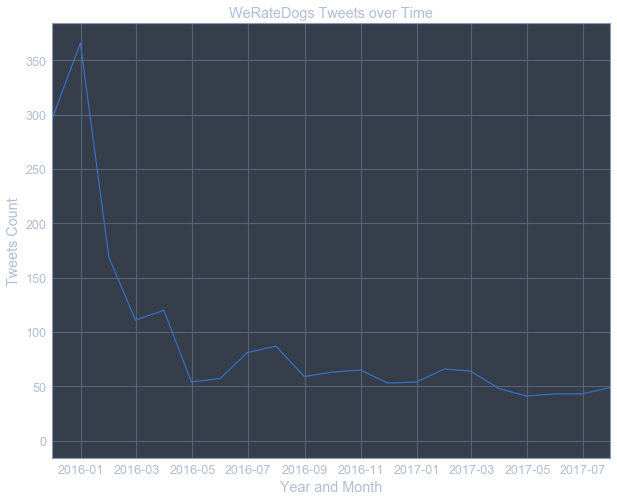

In [125]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

<p>Over time tweets decreased sharply, with spikes in activity during the early spring of 2016, mid-summer of 2016, and generally decreasing from there.</p>

#### #2 Analyze and Visualize: Visualizing the retweet counts, and favorite counts comparison over time.

C:\Users\chels\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


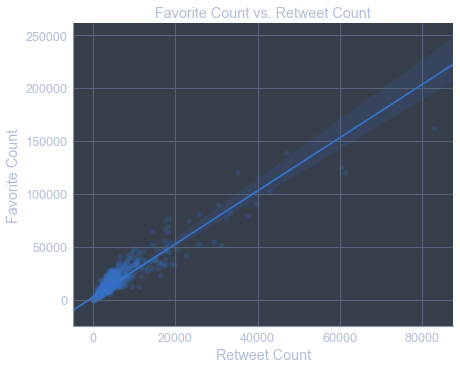

In [126]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_dogs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

<p>Favorite counts are correlated with retweet counts - this is a positive correlation.</p>

#### #3 Analyze and Visualize: Visualizing the most popular dog breed

In [111]:
twitter_dogs['dog_breed'].value_counts()

None                          365
golden_retriever              156
Labrador_retriever            106
Pembroke                       94
Chihuahua                      85
pug                            60
toy_poodle                     49
chow                           46
Samoyed                        41
Pomeranian                     40
malamute                       33
cocker_spaniel                 30
Chesapeake_Bay_retriever       29
French_bulldog                 29
miniature_pinscher             23
German_shepherd                21
Staffordshire_bullterrier      21
Siberian_husky                 20
Eskimo_dog                     20
Maltese_dog                    19
beagle                         19
Shetland_sheepdog              19
Cardigan                       19
Shih-Tzu                       18
Rottweiler                     18
Italian_greyhound              17
kuvasz                         17
basset                         16
Lakeland_terrier               16
Old_English_sh

<p>The most popular dog breed is a golden retriever (ignoring the None label), with a labrador retriever coming in as the second most popular breed. Pembroke isn't far behind.</p>

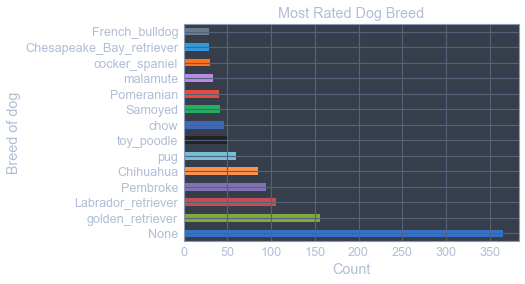

In [131]:
# Histogram to visualize dog breeeds
dog_breed = twitter_dogs.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

#### #4 Analyze and Visualize: Visualizing the most popular dog names

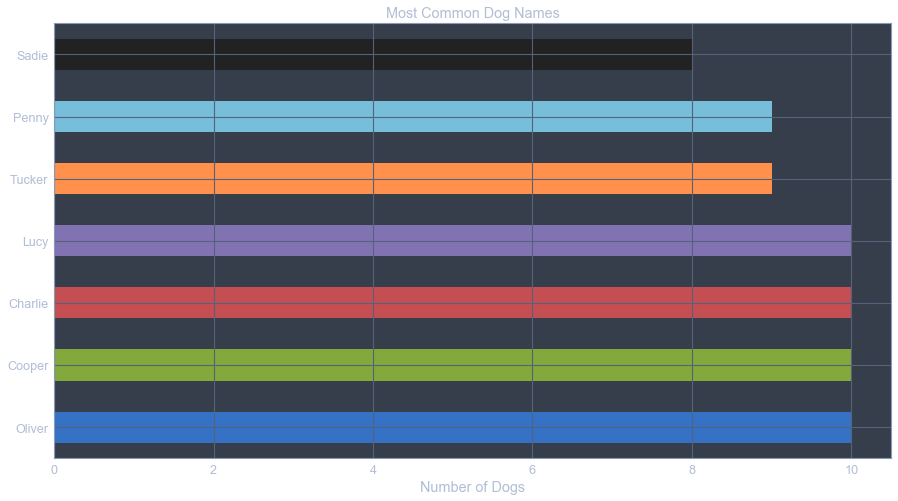

In [134]:
twitter_dogs.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

In [115]:
twitter_dogs.name.value_counts()

Oliver      10
Cooper      10
Charlie     10
Lucy        10
Tucker       9
Penny        9
Sadie        8
Winston      8
Daisy        7
Lola         7
Toby         7
Koda         6
Stanley      6
Jax          6
Bo           6
Bella        6
Milo         5
Oscar        5
Scout        5
Buddy        5
Dave         5
Rusty        5
Bailey       5
Louis        5
Leo          5
Chester      5
George       4
Archie       4
Jerry        4
Cassie       4
            ..
Dotsy        1
Hercules     1
BeBe         1
Miley        1
Staniel      1
Rilo         1
Beya         1
Oreo         1
Ralph        1
Anakin       1
Tebow        1
Jennifur     1
Caryl        1
Sailer       1
Mark         1
Ed           1
Mingus       1
Evy          1
Bronte       1
Harper       1
Duddles      1
Marlee       1
Katie        1
Jonah        1
Harnold      1
Astrid       1
Cal          1
Rizzy        1
Opie         1
Chesney      1
Name: name, Length: 912, dtype: int64

<p>The three most popular dog names are Oliver, Cooper, Charlie, and Lucy for a tie at 10 each.</p>

### Sources


- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python
- https://knowledge.udacity.com/questions/36432
- https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python?answertab=oldest#tab-top
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://tweepy.readthedocs.io/en/v3.2.0/api.html#API.get_status
- Data Analysis Nanodegree/Data Wrangling/Lesson 3: Assessing Data/Concepts 4-18
- https://thepythonguru.com/python-builtin-functions/reduce/
- https://docs.python.org/3/library/datetime.html